<a href="https://colab.research.google.com/github/DeHawk/TMDB_Prediction_Kaggle/blob/master/TMDB_Prediction_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame

In [ ]:
traindf = pd.read_csv("C:\\Users\\rsridhpq\\Desktop\\CW\ML\\final\\data\\train.csv",parse_dates=["release_date"])
testdf = pd.read_csv("C:\\Users\\rsridhpq\\Desktop\\CW\ML\\final\\data\\test.csv",parse_dates=["release_date"])

In [ ]:
traindf.shape,testdf.shape

((3000, 23), (4398, 22))

In [ ]:
tempdf = testdf.copy()
df = traindf.append(testdf)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head(2)


C:\Users\rsridhpq\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,...,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1,tt2637294,en,...,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,12314651.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,2,tt0368933,en,...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,95149435.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement


In [ ]:
df.columns

Index(['Keywords', 'belongs_to_collection', 'budget', 'cast', 'crew', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title'],
      dtype='object')

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [ ]:
# sample test
[text]= eval(df['belongs_to_collection'][0])
text['name']

def extract_collection_name(s):
    try:
        [inter] =eval(s)
        param = inter['name']
    except:
        param = 0
    return param

#New column for collection name
df['collection_name'] = df['belongs_to_collection'].apply(extract_collection_name)


In [ ]:
# Genres
# We can find 2 things - number of genres for a movie and binaries for each genre

#sample test
genre_text = eval(df['genres'][0])
print(genre_text),print(len(genre_text))

def num_data(s):
    try:
        inter = eval(s)
        n_genre = len(inter)
    except:
        n_genre = 0
    return n_genre

def belongTo(s,string):
    try:
        inter = eval(s)
        for every_genre in inter:
            if every_genre['name'] == string:
                return 1
    except:
        return 0
    
    return 0
 
def extract_data(s):
    try:
        genres = []
        for every_genre in eval(s):
            genres.append(every_genre['name'])
    except:
        genres = []
        
    return genres
 
        

[{'id': 35, 'name': 'Comedy'}]
1


In [ ]:
type(df['genres'][0])

str

In [ ]:
display_all(df.head(1))

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,collection_name
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,12314651.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,Hot Tub Time Machine Collection


In [ ]:
df['production_countries'][0] # we can do create similar functions as genre

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [ ]:
cols = ['genres','production_companies','production_countries','spoken_languages','Keywords','cast']

In [ ]:
df.shape

(7398, 24)

In [ ]:
def parse_columns(df,col_name):
    list_of_data = list(df[col_name].apply(extract_data).values)
    top_data = Counter([i for j in list_of_data for i in j]).most_common()
    top_n_data = []
    if len(top_data)>=100:#Change the number here to add as many types of data needed
        num_range = 100
    else:
        num_range = len(top_data)
    for name, count in top_data[0:num_range]:
        top_n_data.append(name)
        
    # Build columns
    df[f'num_of_{col_name}'] = df[col_name].apply(num_data)
    for data_name in top_n_data:
        df[data_name] = df[col_name].apply(lambda x : belongTo(x,data_name))

In [ ]:
for col in cols:
    parse_columns(df,col)

In [ ]:
df.shape

(7398, 512)

In [ ]:
display_all(df.head(1))

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,collection_name,num_of_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Touchstone Pictures,Walt Disney Pictures,Columbia Pictures Corporation,Canal+,TriStar Pictures,Relativity Media,United Artists,Miramax Films,Village Roadshow Pictures,Regency Enterprises,DreamWorks SKG,Fox Searchlight Pictures,Amblin Entertainment,Lionsgate,StudioCanal,Working Title Films,Dune Entertainment,Summit Entertainment,Dimension Films,BBC Films,Orion Pictures,Hollywood Pictures,Fox 2000 Pictures,Film4,Imagine Entertainment,New Regency Pictures,Focus Features,Castle Rock Entertainment,The Weinstein Company,Silver Pictures,Lions Gate Films,Legendary Pictures,Morgan Creek Productions,Scott Rudin Productions,France 2 Cinéma,Screen Gems,Scott Free Productions,Epsilon Motion Pictures,Spyglass Entertainment,Davis Entertainment,TSG Entertainment,Lakeshore Entertainment,PolyGram Filmed Entertainment,Participant Media,Original Film,Ciné+,Millennium Films,DreamWorks Animation,A24,Wild Bunch,Blumhouse Productions,UK Film Council,EuropaCorp,Revolution Studios,TF1 Films Production,Malpaso Productions,Happy Madison Productions,Studio Babelsberg,Centre National de la Cinématographie (CNC),Dune Entertainment III,Ingenious Film Partners,Gaumont,Walt Disney Productions,FilmNation Entertainment,Studio Canal,Vertigo Entertainment,Jerry Bruckheimer Films,Arte France Cinéma,Intermedia Films,Canal+ España,IM Global,Eon Productions,Carolco Pictures,NPV Entertainment,Lucasfilm,Ingenious Media,Film i Väst,Alcon Entertainment,Apatow Productions,Channel Four Films,Téléfilm Canada,Interscope Communications,Walden Media,Constantin Film Produktion,Emmett/Furla Films,Anonymous Content,Di Bonaventura Pictures,RKO Radio Pictures,American Zoetrope,Dino De Laurentiis Company,Marvel Enterprises,Franchise Pictures,Nickelodeon Movies,num_of_production_countries,United States of America,United Kingdom,France,Germany,Canada,India,Italy,Japan,Australia,Spain,Russia,China,Hong Kong,Belgium,Ireland,South Korea,Sweden,Mexico,Netherlands,Denmark,New Zealand,Czech Republic,Switzerland,South Africa,Brazil,Norway,Austria,Luxembourg,Romania,Finland,Hungary,Poland,Israel,United Arab Emirates,Argentina,Turkey,Thailand,Taiwan,Chile,Greece,Iceland,Philippines,Bulgaria,Ukraine,Iran,Morocco,Serbia,Malta,Indonesia,Peru,Tunisia,Portugal,Puerto Rico,Pakistan,Algeria,Qatar,Croatia,Singapore,Bahamas,Burkina Faso,Cambodia,Mauritania,Venezuela,Monaco,Ecuador,Mongolia,Namibia,Bosnia and Herzegovina,Serbia and Montenegro,Ethiopia,Slovenia,Saudi Arabia,Jordan,Cyprus,Uruguay,Paraguay,Costa Rica,Ghana,Botswana,Georgia,Afghanistan,Colombia,Dominican Republic,Mali,Cote D'Ivoire,Cameroon,Senegal,Sri Lanka,Angola,Kazakhstan,Liechtenstein,Lithuania,Palestinian Territory,Congo,Bolivia,Macedonia,Malaysia,Jamaica,num_of_spoken_languages,English,Français,Español,Deutsch,Pусский,Italiano,日本語,普通话,हिन्दी,,العربية,Português,广州话 / 廣州話,한국어/조선말,Polski,Latin,Magyar,Český,ภาษาไทย,தமிழ்,svenska,עִבְרִית,Türkçe,ελληνικά,Dansk,Nederlands,اردو,Română,Tiếng Việt,Norsk,తెలుగు,Український,فارسی,suomi,No Language,Srpski,Afrikaans,Íslenska,বাংলা,Kiswahili,Gaeilge,Català,български език,shqip,ਪੰਜਾਬੀ,Bahasa indonesia,Slovenčina,Esperanto,isiZulu,Somali,Hrvatski,Bamanankan,ქართული,Bosanski,Cymraeg,қазақ,euskera,Eesti,?????,Wolof,پښتو,Galego,Bahasa melayu,Malti,num_of_Keywords,woman director,independent film,duringcreditsstinger,based on novel,murder,violence,love,revenge,sex,aftercreditsstinger,biography,s

In [ ]:
#sample tests
def extract_director(s):
    try:
        eval_str = eval(s)
        for strs in eval_str:
            if strs['job'] =='Director':
                director_name = strs['name']
        if not director_name:
            director_name = 0
    except:
        director_name = 0
        
    return director_name

In [ ]:
list_of_directors = list(df['crew'].apply(extract_director).values) 
top_directors = Counter([i for i in list_of_directors]).most_common()
top20_directors = [] 
for dir_name,count in top_directors[0:20]:
    if dir_name !=0:
        top20_directors.append(dir_name)

In [ ]:
# Build director columns
for data_name in top20_directors:
        df[f'{data_name}_director'] = df['crew'].apply(lambda x : belongTo(x,data_name))

In [ ]:
display_all(df.head(1))

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,collection_name,num_of_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Touchstone Pictures,Walt Disney Pictures,Columbia Pictures Corporation,Canal+,TriStar Pictures,Relativity Media,United Artists,Miramax Films,Village Roadshow Pictures,Regency Enterprises,DreamWorks SKG,Fox Searchlight Pictures,Amblin Entertainment,Lionsgate,StudioCanal,Working Title Films,Dune Entertainment,Summit Entertainment,Dimension Films,BBC Films,Orion Pictures,Hollywood Pictures,Fox 2000 Pictures,Film4,Imagine Entertainment,New Regency Pictures,Focus Features,Castle Rock Entertainment,The Weinstein Company,Silver Pictures,Lions Gate Films,Legendary Pictures,Morgan Creek Productions,Scott Rudin Productions,France 2 Cinéma,Screen Gems,Scott Free Productions,Epsilon Motion Pictures,Spyglass Entertainment,Davis Entertainment,TSG Entertainment,Lakeshore Entertainment,PolyGram Filmed Entertainment,Participant Media,Original Film,Ciné+,Millennium Films,DreamWorks Animation,A24,Wild Bunch,Blumhouse Productions,UK Film Council,EuropaCorp,Revolution Studios,TF1 Films Production,Malpaso Productions,Happy Madison Productions,Studio Babelsberg,Centre National de la Cinématographie (CNC),Dune Entertainment III,Ingenious Film Partners,Gaumont,Walt Disney Productions,FilmNation Entertainment,Studio Canal,Vertigo Entertainment,Jerry Bruckheimer Films,Arte France Cinéma,Intermedia Films,Canal+ España,IM Global,Eon Productions,Carolco Pictures,NPV Entertainment,Lucasfilm,Ingenious Media,Film i Väst,Alcon Entertainment,Apatow Productions,Channel Four Films,Téléfilm Canada,Interscope Communications,Walden Media,Constantin Film Produktion,Emmett/Furla Films,Anonymous Content,Di Bonaventura Pictures,RKO Radio Pictures,American Zoetrope,Dino De Laurentiis Company,Marvel Enterprises,Franchise Pictures,Nickelodeon Movies,num_of_production_countries,United States of America,United Kingdom,France,Germany,Canada,India,Italy,Japan,Australia,Spain,Russia,China,Hong Kong,Belgium,Ireland,South Korea,Sweden,Mexico,Netherlands,Denmark,New Zealand,Czech Republic,Switzerland,South Africa,Brazil,Norway,Austria,Luxembourg,Romania,Finland,Hungary,Poland,Israel,United Arab Emirates,Argentina,Turkey,Thailand,Taiwan,Chile,Greece,Iceland,Philippines,Bulgaria,Ukraine,Iran,Morocco,Serbia,Malta,Indonesia,Peru,Tunisia,Portugal,Puerto Rico,Pakistan,Algeria,Qatar,Croatia,Singapore,Bahamas,Burkina Faso,Cambodia,Mauritania,Venezuela,Monaco,Ecuador,Mongolia,Namibia,Bosnia and Herzegovina,Serbia and Montenegro,Ethiopia,Slovenia,Saudi Arabia,Jordan,Cyprus,Uruguay,Paraguay,Costa Rica,Ghana,Botswana,Georgia,Afghanistan,Colombia,Dominican Republic,Mali,Cote D'Ivoire,Cameroon,Senegal,Sri Lanka,Angola,Kazakhstan,Liechtenstein,Lithuania,Palestinian Territory,Congo,Bolivia,Macedonia,Malaysia,Jamaica,num_of_spoken_languages,English,Français,Español,Deutsch,Pусский,Italiano,日本語,普通话,हिन्दी,,العربية,Português,广州话 / 廣州話,한국어/조선말,Polski,Latin,Magyar,Český,ภาษาไทย,தமிழ்,svenska,עִבְרִית,Türkçe,ελληνικά,Dansk,Nederlands,اردو,Română,Tiếng Việt,Norsk,తెలుగు,Український,فارسی,suomi,No Language,Srpski,Afrikaans,Íslenska,বাংলা,Kiswahili,Gaeilge,Català,български език,shqip,ਪੰਜਾਬੀ,Bahasa indonesia,Slovenčina,Esperanto,isiZulu,Somali,Hrvatski,Bamanankan,ქართული,Bosanski,Cymraeg,қазақ,euskera,Eesti,?????,Wolof,پښتو,Galego,Bahasa melayu,Malti,num_of_Keywords,woman director,independent film,duringcreditsstinger,based on novel,murder,violence,love,revenge,sex,aftercreditsstinger,biography,s

In [ ]:
df['release_date'][0:5]

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]

In [ ]:
df['release_date'].isna().sum()

1

In [ ]:
df['release_date'].fillna(pd.to_datetime('2000-01-01'),inplace=True)

In [ ]:
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df

In [ ]:
df = process_date(df)

In [ ]:
display_all(df.head(1))

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,collection_name,num_of_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Touchstone Pictures,Walt Disney Pictures,Columbia Pictures Corporation,Canal+,TriStar Pictures,Relativity Media,United Artists,Miramax Films,Village Roadshow Pictures,Regency Enterprises,DreamWorks SKG,Fox Searchlight Pictures,Amblin Entertainment,Lionsgate,StudioCanal,Working Title Films,Dune Entertainment,Summit Entertainment,Dimension Films,BBC Films,Orion Pictures,Hollywood Pictures,Fox 2000 Pictures,Film4,Imagine Entertainment,New Regency Pictures,Focus Features,Castle Rock Entertainment,The Weinstein Company,Silver Pictures,Lions Gate Films,Legendary Pictures,Morgan Creek Productions,Scott Rudin Productions,France 2 Cinéma,Screen Gems,Scott Free Productions,Epsilon Motion Pictures,Spyglass Entertainment,Davis Entertainment,TSG Entertainment,Lakeshore Entertainment,PolyGram Filmed Entertainment,Participant Media,Original Film,Ciné+,Millennium Films,DreamWorks Animation,A24,Wild Bunch,Blumhouse Productions,UK Film Council,EuropaCorp,Revolution Studios,TF1 Films Production,Malpaso Productions,Happy Madison Productions,Studio Babelsberg,Centre National de la Cinématographie (CNC),Dune Entertainment III,Ingenious Film Partners,Gaumont,Walt Disney Productions,FilmNation Entertainment,Studio Canal,Vertigo Entertainment,Jerry Bruckheimer Films,Arte France Cinéma,Intermedia Films,Canal+ España,IM Global,Eon Productions,Carolco Pictures,NPV Entertainment,Lucasfilm,Ingenious Media,Film i Väst,Alcon Entertainment,Apatow Productions,Channel Four Films,Téléfilm Canada,Interscope Communications,Walden Media,Constantin Film Produktion,Emmett/Furla Films,Anonymous Content,Di Bonaventura Pictures,RKO Radio Pictures,American Zoetrope,Dino De Laurentiis Company,Marvel Enterprises,Franchise Pictures,Nickelodeon Movies,num_of_production_countries,United States of America,United Kingdom,France,Germany,Canada,India,Italy,Japan,Australia,Spain,Russia,China,Hong Kong,Belgium,Ireland,South Korea,Sweden,Mexico,Netherlands,Denmark,New Zealand,Czech Republic,Switzerland,South Africa,Brazil,Norway,Austria,Luxembourg,Romania,Finland,Hungary,Poland,Israel,United Arab Emirates,Argentina,Turkey,Thailand,Taiwan,Chile,Greece,Iceland,Philippines,Bulgaria,Ukraine,Iran,Morocco,Serbia,Malta,Indonesia,Peru,Tunisia,Portugal,Puerto Rico,Pakistan,Algeria,Qatar,Croatia,Singapore,Bahamas,Burkina Faso,Cambodia,Mauritania,Venezuela,Monaco,Ecuador,Mongolia,Namibia,Bosnia and Herzegovina,Serbia and Montenegro,Ethiopia,Slovenia,Saudi Arabia,Jordan,Cyprus,Uruguay,Paraguay,Costa Rica,Ghana,Botswana,Georgia,Afghanistan,Colombia,Dominican Republic,Mali,Cote D'Ivoire,Cameroon,Senegal,Sri Lanka,Angola,Kazakhstan,Liechtenstein,Lithuania,Palestinian Territory,Congo,Bolivia,Macedonia,Malaysia,Jamaica,num_of_spoken_languages,English,Français,Español,Deutsch,Pусский,Italiano,日本語,普通话,हिन्दी,,العربية,Português,广州话 / 廣州話,한국어/조선말,Polski,Latin,Magyar,Český,ภาษาไทย,தமிழ்,svenska,עִבְרִית,Türkçe,ελληνικά,Dansk,Nederlands,اردو,Română,Tiếng Việt,Norsk,తెలుగు,Український,فارسی,suomi,No Language,Srpski,Afrikaans,Íslenska,বাংলা,Kiswahili,Gaeilge,Català,български език,shqip,ਪੰਜਾਬੀ,Bahasa indonesia,Slovenčina,Esperanto,isiZulu,Somali,Hrvatski,Bamanankan,ქართული,Bosanski,Cymraeg,қазақ,euskera,Eesti,?????,Wolof,پښتو,Galego,Bahasa melayu,Malti,num_of_Keywords,woman director,independent film,duringcreditsstinger,based on novel,murder,violence,love,revenge,sex,aftercreditsstinger,biography,s

In [ ]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    x = str(x)
    year = x.split('-')[0]
    if int(year) > 2019:
        return pd.to_datetime('19'+year[2:]+'-'+x[4:])
    else:
        return pd.to_datetime(x)


In [ ]:
df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))
df = process_date(df)
display_all(df.head(1))

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,collection_name,num_of_genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Touchstone Pictures,Walt Disney Pictures,Columbia Pictures Corporation,Canal+,TriStar Pictures,Relativity Media,United Artists,Miramax Films,Village Roadshow Pictures,Regency Enterprises,DreamWorks SKG,Fox Searchlight Pictures,Amblin Entertainment,Lionsgate,StudioCanal,Working Title Films,Dune Entertainment,Summit Entertainment,Dimension Films,BBC Films,Orion Pictures,Hollywood Pictures,Fox 2000 Pictures,Film4,Imagine Entertainment,New Regency Pictures,Focus Features,Castle Rock Entertainment,The Weinstein Company,Silver Pictures,Lions Gate Films,Legendary Pictures,Morgan Creek Productions,Scott Rudin Productions,France 2 Cinéma,Screen Gems,Scott Free Productions,Epsilon Motion Pictures,Spyglass Entertainment,Davis Entertainment,TSG Entertainment,Lakeshore Entertainment,PolyGram Filmed Entertainment,Participant Media,Original Film,Ciné+,Millennium Films,DreamWorks Animation,A24,Wild Bunch,Blumhouse Productions,UK Film Council,EuropaCorp,Revolution Studios,TF1 Films Production,Malpaso Productions,Happy Madison Productions,Studio Babelsberg,Centre National de la Cinématographie (CNC),Dune Entertainment III,Ingenious Film Partners,Gaumont,Walt Disney Productions,FilmNation Entertainment,Studio Canal,Vertigo Entertainment,Jerry Bruckheimer Films,Arte France Cinéma,Intermedia Films,Canal+ España,IM Global,Eon Productions,Carolco Pictures,NPV Entertainment,Lucasfilm,Ingenious Media,Film i Väst,Alcon Entertainment,Apatow Productions,Channel Four Films,Téléfilm Canada,Interscope Communications,Walden Media,Constantin Film Produktion,Emmett/Furla Films,Anonymous Content,Di Bonaventura Pictures,RKO Radio Pictures,American Zoetrope,Dino De Laurentiis Company,Marvel Enterprises,Franchise Pictures,Nickelodeon Movies,num_of_production_countries,United States of America,United Kingdom,France,Germany,Canada,India,Italy,Japan,Australia,Spain,Russia,China,Hong Kong,Belgium,Ireland,South Korea,Sweden,Mexico,Netherlands,Denmark,New Zealand,Czech Republic,Switzerland,South Africa,Brazil,Norway,Austria,Luxembourg,Romania,Finland,Hungary,Poland,Israel,United Arab Emirates,Argentina,Turkey,Thailand,Taiwan,Chile,Greece,Iceland,Philippines,Bulgaria,Ukraine,Iran,Morocco,Serbia,Malta,Indonesia,Peru,Tunisia,Portugal,Puerto Rico,Pakistan,Algeria,Qatar,Croatia,Singapore,Bahamas,Burkina Faso,Cambodia,Mauritania,Venezuela,Monaco,Ecuador,Mongolia,Namibia,Bosnia and Herzegovina,Serbia and Montenegro,Ethiopia,Slovenia,Saudi Arabia,Jordan,Cyprus,Uruguay,Paraguay,Costa Rica,Ghana,Botswana,Georgia,Afghanistan,Colombia,Dominican Republic,Mali,Cote D'Ivoire,Cameroon,Senegal,Sri Lanka,Angola,Kazakhstan,Liechtenstein,Lithuania,Palestinian Territory,Congo,Bolivia,Macedonia,Malaysia,Jamaica,num_of_spoken_languages,English,Français,Español,Deutsch,Pусский,Italiano,日本語,普通话,हिन्दी,,العربية,Português,广州话 / 廣州話,한국어/조선말,Polski,Latin,Magyar,Český,ภาษาไทย,தமிழ்,svenska,עִבְרִית,Türkçe,ελληνικά,Dansk,Nederlands,اردو,Română,Tiếng Việt,Norsk,తెలుగు,Український,فارسی,suomi,No Language,Srpski,Afrikaans,Íslenska,বাংলা,Kiswahili,Gaeilge,Català,български език,shqip,ਪੰਜਾਬੀ,Bahasa indonesia,Slovenčina,Esperanto,isiZulu,Somali,Hrvatski,Bamanankan,ქართული,Bosanski,Cymraeg,қазақ,euskera,Eesti,?????,Wolof,پښتو,Galego,Bahasa melayu,Malti,num_of_Keywords,woman director,independent film,duringcreditsstinger,based on novel,murder,violence,love,revenge,sex,aftercreditsstinger,biography,s

In [ ]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

EDA

In [ ]:
df_Train = df[df['revenue'].notnull()]
df_Test = df[df['revenue'].isnull()]
df_Test.head(2)

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,...,Richard Linklater_director,Rob Reiner_director,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter,log_budget,log_revenue
3000,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,3001,tt1226251,ja,...,0,0,2007,5,7,28,14,3,0.000000,NaN
3001,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...",NaN,88000,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...","[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,3002,tt0051380,en,...,0,0,1958,0,5,21,19,2,11.385103,NaN


Text(0.5, 1.0, 'Revenue against weekday')

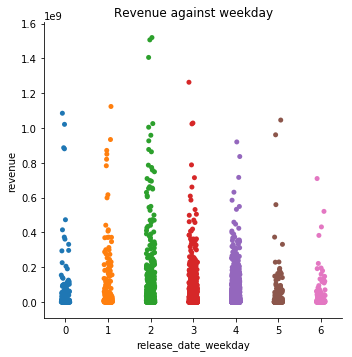

In [ ]:
#Visualization on date fields
sns.catplot(x='release_date_weekday',y='revenue',data=df_Train)
plt.title('Revenue against weekday')

Text(0.5, 1.0, 'Movie revenue against year of release')

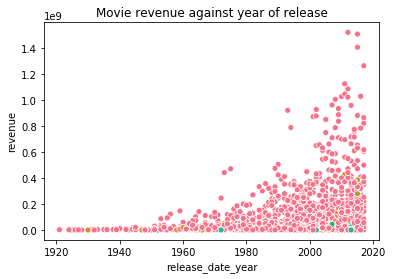

In [ ]:
sns.scatterplot(x='release_date_year',y='revenue',data=df_Train
                ,hue='original_language',legend=False)
plt.title("Movie revenue against year of release")

In [ ]:
df.columns[:24]

Index(['Keywords', 'belongs_to_collection', 'budget', 'cast', 'crew', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'collection_name'],
      dtype='object')

In [ ]:
remove_columns = list(df.columns[:24])
needed_columns = ['popularity','runtime','original_language','title']
remove_columns = [e for e in remove_columns if e not in needed_columns]

In [ ]:
train = df_Train.drop(columns=remove_columns,axis=1)

In [ ]:
X = train.drop(['log_revenue'],axis=1)
y = train['log_revenue']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2100, 518), (900, 518), (2100,), (900,))

In [ ]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
X_train_enc['original_language'].dtype == 'object'

True

In [ ]:
for col in X_train_enc.columns:
    if X_train_enc[col].dtype =='object':
        X_train_enc[col] = pd.get_dummies(X_train_enc[col])

for col in X_test_enc.columns:
    if X_test_enc[col].dtype =='object':
        X_test_enc[col] = pd.get_dummies(X_test_enc[col])
        

In [ ]:
X_train_enc.fillna(0,inplace=True)
X_test_enc.fillna(0,inplace=True)

In [ ]:
rf = RandomForestRegressor(n_estimators=2000,oob_score=True)
rf.fit(X_train_enc,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_train_predict = rf.predict(X_train_enc)
y_test_predict = rf.predict(X_test_enc)

In [ ]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [ ]:
print(rmse(y_train_predict,y_train),rmse(y_test_predict,y_test),
      rf.score(X_train_enc,y_train),rf.score(X_test_enc,y_test))


0.783056119729345 2.222825910172535 0.9337664222277865 0.48675030951304404


In [ ]:
rf.oob_score_

0.5111990861401274

In [ ]:
rf.feature_importances_.mean()

0.00193050193050193

In [ ]:
%time select_model = SelectFromModel(rf,threshold=rf.feature_importances_.mean())
select_model.fit(X_train_enc,y_train)


Wall time: 232 ms


SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold=0.00193050193050193)

In [ ]:
X_train_selected = select_model.transform(X_train_enc)
X_test_selected = select_model.transform(X_test_enc)

In [ ]:
rf_sel = RandomForestRegressor(n_estimators=2000,oob_score=True)
rf_sel.fit(X_train_selected,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_train_predict1 = rf_sel.predict(X_train_selected)
y_test_predict1 = rf_sel.predict(X_test_selected)

In [ ]:
print(rmse(y_train_predict1,y_train),rmse(y_test_predict1,y_test),
      rf_sel.score(X_train_selected,y_train),rf_sel.score(X_test_selected,y_test))

0.7732887141740927 2.2290219685160184 0.9354084386192735 0.4838849863562087


In [ ]:
x_feats = []
y_feats = []
for features in zip(X_train_enc.columns,rf.feature_importances_):
    if features[1]>=2*rf.feature_importances_.mean():
        x_feats.append(features[0])
        y_feats.append(features[1])
        

Text(0.5, 1.0, 'Feature importance plot')

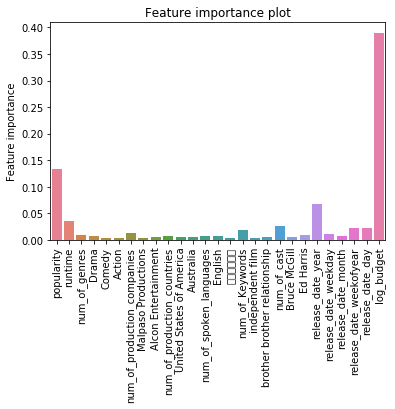

In [ ]:
sns.barplot(x_feats,y_feats,palette='husl')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title("Feature importance plot")

In [ ]:
#df_Train.to_csv("preprocess_train_ram.csv", encoding='utf-8', index=False)
#df_Test.to_csv("preprocess_test_ram.csv", encoding='utf-8', index=False)